In [4]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import cos

In [10]:
arr=(np.loadtxt("town_temperature.txt",usecols=(0,1), skiprows=1,unpack=True))

In [11]:
arr.shape

(2, 273)

In [45]:
Date=arr[0,:]
Temp=arr[1,:]

Temp.max()

85.7

In [46]:
Temp.min()

-99.0

In [48]:
Date.max()

2016.0

In [49]:
Date.min()

1744.0

Text(0.5, 1.0, 'Plot of Average temperature against the Time in years')

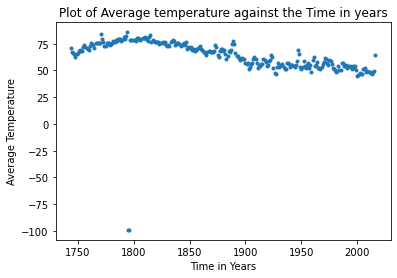

In [47]:
import matplotlib.pyplot as plt
plt.plot(x,y,'.')
plt.xlabel("Time in Years")
plt.ylabel("Average Temperature")
plt.title("Plot of Average temperature against the Time in years")

In [16]:
def line(x,a,b):
    return a*x+b

In [24]:
from scipy.optimize import curve_fit
Date = np.array(Date)
Temp = np.array(Temp)

In [103]:
popt, pcov=curve_fit(line, Date, Temp)

In [26]:
popt

array([-9.70602393e-02,  2.46237719e+02])

In [27]:
pcov

array([[ 1.46645126e-04, -2.75692836e-01],
       [-2.75692836e-01,  5.19213294e+02]])

In [108]:
e=np.repeat(55.,len(Date))

In [107]:
e

array([55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55

In [111]:
popt, pcov=curve_fit(line, Date,Temp, sigma=e)

<ErrorbarContainer object of 3 artists>

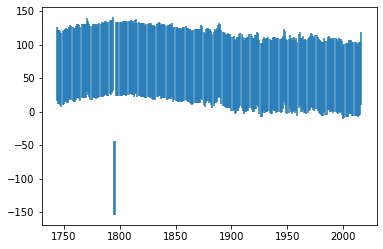

In [112]:
plt.errorbar(Date,Temp,yerr=e, fmt="none", label="Data with error bars")

In [33]:
popt

array([-9.70602402e-02,  2.46237721e+02])

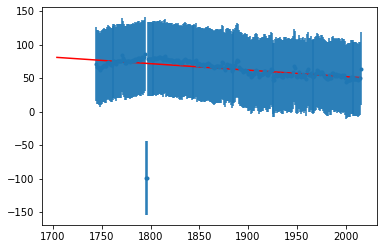

In [115]:
plt.errorbar(x,y,yerr=e,fmt='.')
xfine=np.linspace(1704.0,2016.0,273)
plt.plot(xfine,line(xfine, *popt),'r-', label='Fitted curve')

In [53]:
#f(t) = a cost(2pi*t + b) +c
# Define the function to fit
def equation(t,a, b, c):
    return a*np.cos(2*np.pi*x+ b)+ c

In [117]:
popt, pcov = curve_fit(equation, Date, Temp)

In [118]:
popt

array([ 1.42035472e-03, -1.16047294e+04,  6.37663777e+01])

In [119]:
pcov

array([[ 9.24866789e-06, -1.34133043e+00,  8.96814638e-06],
       [-1.34133043e+00,  1.31591706e+06,  1.59278540e+00],
       [ 8.96814638e-06,  1.59278540e+00,  1.12978144e+00]])

In [120]:
popt, pcov=curve_fit(equation, Date,Temp, sigma=e)

<ErrorbarContainer object of 3 artists>

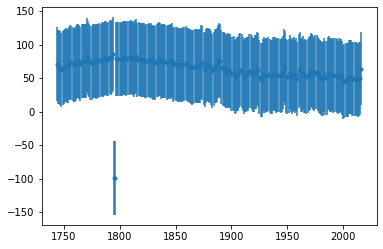

In [121]:
plt.errorbar(Date, Temp, yerr=e, fmt=".", label="Data with error bars")

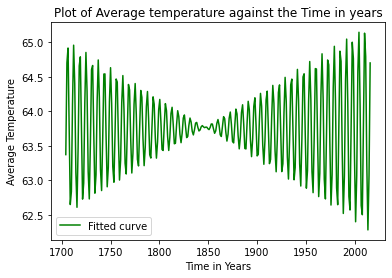

In [131]:
xfine=np.linspace(1704.0,2016.0,273)
y_model =equation(xfine, *popt)
plt.plot(xfine, y_model, 'g-', label="Fitted curve")
plt.xlabel("Time in Years")
plt.ylabel("Average Temperature")
plt.title("Plot of Average temperature against the Time in years")
plt.legend()